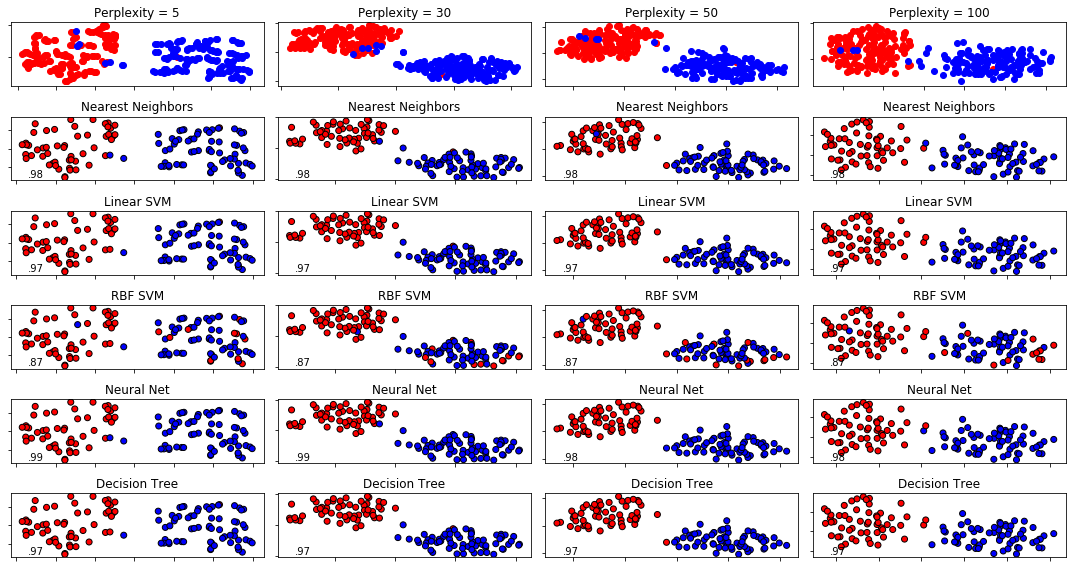

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from collections import namedtuple

n_samples = 300
n_components = 2
random_state = 111
meshstep = 0.5

clf_s = [
    ("Nearest Neighbors", KNeighborsClassifier(3)),
    ("Linear SVM", SVC(kernel="linear", C=0.025)),
    ("RBF SVM", SVC(gamma=2, C=1)),
    ("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),

]


perplexities = [5, 30, 50, 100]

X, y = datasets.make_classification(n_samples = n_samples, n_features=5, n_redundant=0, n_informative=2, random_state=random_state, n_clusters_per_class=1)
indexes = range(X.shape[0])

(fig, subplots) = plt.subplots(len(clf_s) + 1, len(perplexities), figsize=(15, 8))

red = y == 0
blue = y == 1

X_train, X_test, y_train, y_test, ind_train, ind_test = train_test_split(X, y, indexes, test_size=.4, random_state=random_state)

# Red Blue color map
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    tsne = manifold.TSNE(n_components=n_components, init='random', random_state=random_state, perplexity=perplexity)
    Y = tsne.fit_transform(X)

    ax.set_title(f"Perplexity = {perplexity}")

    ax.scatter(Y[red, 0], Y[red, 1], c = 'r')
    ax.scatter(Y[blue, 0], Y[blue, 1], c = 'b')
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    for index, (name, clf) in enumerate(clf_s):
        ax = subplots[index + 1][i]

        # plot all points
        

        ax.set_title(f"{name}")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

        # test clf
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_prediction = clf.predict(X_test)

        # plot test points
        ax.scatter(Y[ind_test, 0], Y[ind_test, 1], c = y_prediction, cmap = cm_bright, edgecolors = 'k')
        ax.text(0.1, 0.1,"{0:.2f}".format(score).lstrip('0'), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)


plt.tight_layout()
plt.show()
